## Data Analysis And Visualization

In [2]:
# Pranav Khude (202151077)
# Sudhanshu Bhale (202151164)

In [3]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [4]:
pd.set_option('display.max_columns', None)

Loading data


In [5]:
df = pd.read_csv('Real_Estate_Sales_2001-2021_GL.csv')

C:\Users\Pranav\AppData\Local\Temp\ipykernel_8944\2307317809.py:1: DtypeWarning: Columns (8,9,10,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Real_Estate_Sales_2001-2021_GL.csv')


In [6]:
df.head()

,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Non Use Code,Assessor Remarks,OPM remarks,Location
0,2020348,2020,09/13/2021,Ansonia,230 WAKELEE AVE,150500.0,325000.0,0.4630,Commercial,NaN,NaN,NaN,NaN,NaN
1,20002,2020,10/02/2020,Ashford,390 TURNPIKE RD,253000.0,430000.0,0.5883,Residential,Single Family,NaN,NaN,NaN,NaN
2,210317,2021,07/05/2022,Avon,53 COTSWOLD WAY,329730.0,805000.0,0.4096,Residential,Single Family,NaN,NaN,NaN,POINT (-72.846365959 41.781677018)
3,200212,2020,03/09/2021,Avon,5 CHESTNUT DRIVE,130400.0,179900.0,0.7248,Residential,Condo,NaN,NaN,NaN,NaN
4,200243,2020,04/13/2021,Avon,111 NORTHINGTON DRIVE,619290.0,890000.0,0.6958,Residential,Single Family,NaN,NaN,NaN,NaN


In [7]:
df.describe()

,Serial Number,List Year,Assessed Value,Sale Amount,Sales Ratio
count,1.054159e+06,1.054159e+06,1.054159e+06,1.054159e+06,1.054159e+06
mean,5.027140e+05,2.010774e+03,2.797416e+05,3.990286e+05,9.953241e+00
std,7.230239e+06,6.540711e+00,1.650117e+06,5.229758e+06,1.838434e+03
min,0.000000e+00,2.001000e+03,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.055200e+04,2.004000e+03,8.845000e+04,1.422000e+05,4.816008e-01
50%,8.008000e+04,2.011000e+03,1.395800e+05,2.300000e+05,6.162887e-01
75%,1.608155e+05,2.017000e+03,2.270000e+05,3.700000e+05,7.764000e-01
max,2.000500e+09,2.021000e+03,8.815100e+08,5.000000e+09,1.226420e+06


In [8]:
df.shape

(1054159, 14)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1054159 entries, 0 to 1054158
Data columns (total 14 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   Serial Number     1054159 non-null  int64  
 1   List Year         1054159 non-null  int64  
 2   Date Recorded     1054157 non-null  object 
 3   Town              1054159 non-null  object 
 4   Address           1054108 non-null  object 
 5   Assessed Value    1054159 non-null  float64
 6   Sale Amount       1054159 non-null  float64
 7   Sales Ratio       1054159 non-null  float64
 8   Property Type     671713 non-null   object 
 9   Residential Type  660275 non-null   object 
 10  Non Use Code      302242 non-null   object 
 11  Assessor Remarks  161472 non-null   object 
 12  OPM remarks       11564 non-null    object 
 13  Location          254643 non-null   object 
dtypes: float64(3), int64(2), object(9)
memory usage: 112.6+ MB


In [10]:
df.columns

Index(['Serial Number', 'List Year', 'Date Recorded', 'Town', 'Address',
       'Assessed Value', 'Sale Amount', 'Sales Ratio', 'Property Type',
       'Residential Type', 'Non Use Code', 'Assessor Remarks', 'OPM remarks',
       'Location'],
      dtype='object')

## Data cleaning

In [11]:
#null values
df.isnull().sum()

Serial Number             0
List Year                 0
Date Recorded             2
Town                      0
Address                  51
Assessed Value            0
Sale Amount               0
Sales Ratio               0
Property Type        382446
Residential Type     393884
Non Use Code         751917
Assessor Remarks     892687
OPM remarks         1042595
Location             799516
dtype: int64

In [12]:
#unique values
df.nunique()

Serial Number        90873
List Year               21
Date Recorded         6673
Town                   170
Address             747237
Assessed Value       95244
Sale Amount          59462
Sales Ratio         552075
Property Type           11
Residential Type         5
Non Use Code           106
Assessor Remarks     71479
OPM remarks           5730
Location            180613
dtype: int64

In [13]:
#drop rows with missing values
df.dropna(subset=['Address'], inplace=True)

In [14]:
df['Property Type'].fillna(df['Property Type'].value_counts().idxmax(), inplace=True)
df['Residential Type'].fillna(df['Residential Type'].value_counts().idxmax(), inplace=True)


C:\Users\Pranav\AppData\Local\Temp\ipykernel_8944\68083156.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Property Type'].fillna(df['Property Type'].value_counts().idxmax(), inplace=True)
C:\Users\Pranav\AppData\Local\Temp\ipykernel_8944\68083156.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values a

In [15]:
#droping colmns with more than 50% missing values
df.drop(['Non Use Code', 'Assessor Remarks', 'OPM remarks'], axis=1, inplace=True)

In [16]:
df.isnull().sum()

Serial Number            0
List Year                0
Date Recorded            0
Town                     0
Address                  0
Assessed Value           0
Sale Amount              0
Sales Ratio              0
Property Type            0
Residential Type         0
Location            799470
dtype: int64

In [17]:
numerical_vars =  df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_vars =  df.select_dtypes(include=['object']).columns.tolist()                           
print('Numerical variables:', numerical_vars)
print('Categorical variables:', categorical_vars)


Numerical variables: ['Serial Number', 'List Year', 'Assessed Value', 'Sale Amount', 'Sales Ratio']
Categorical variables: ['Date Recorded', 'Town', 'Address', 'Property Type', 'Residential Type', 'Location']


In [18]:
# Checking for duplicate rows
df[df.duplicated(keep=False)]

,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Location


In [19]:
df.head()


,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Location
0,2020348,2020,09/13/2021,Ansonia,230 WAKELEE AVE,150500.0,325000.0,0.4630,Commercial,Single Family,NaN
1,20002,2020,10/02/2020,Ashford,390 TURNPIKE RD,253000.0,430000.0,0.5883,Residential,Single Family,NaN
2,210317,2021,07/05/2022,Avon,53 COTSWOLD WAY,329730.0,805000.0,0.4096,Residential,Single Family,POINT (-72.846365959 41.781677018)
3,200212,2020,03/09/2021,Avon,5 CHESTNUT DRIVE,130400.0,179900.0,0.7248,Residential,Condo,NaN
4,200243,2020,04/13/2021,Avon,111 NORTHINGTON DRIVE,619290.0,890000.0,0.6958,Residential,Single Family,NaN


In [20]:
df['Sale Amount'].max()

5000000000.0

## Data Visualization

In [21]:
#group by town with highest number of sales
df.groupby('Town').size().sort_values(ascending=False)

Town
Bridgeport       36484
Stamford         34994
Waterbury        30890
Norwalk          25681
New Haven        22721
                 ...  
Hartland           487
Canaan             474
Scotland           463
Union              287
***Unknown***        1
Length: 170, dtype: int64

Pieplot for top 10 Towns with highest real estate property counts

<Axes: ylabel='count'>

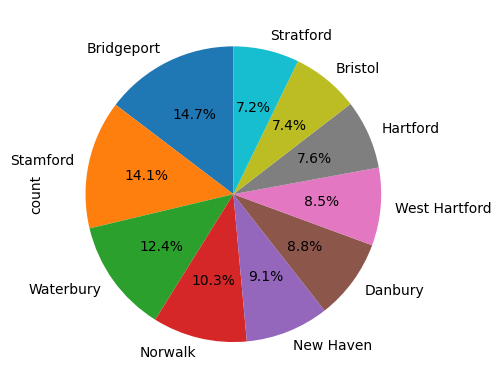

In [22]:
#plotting pie chat for above with count lables for top 10 towns
df['Town'].value_counts().head(10).plot.pie(autopct='%1.1f%%', startangle=90)


In [23]:
#average sale price by town wit
df.groupby('Town')['Sale Amount'].mean().sort_values(ascending=False)

Town
Willington    4.317257e+06
Greenwich     2.071225e+06
Darien        1.574388e+06
New Canaan    1.531862e+06
Westport      1.443576e+06
                  ...     
Chaplin       1.727871e+05
Windham       1.675278e+05
Plymouth      1.674735e+05
Torrington    1.659103e+05
Stafford      1.467241e+05
Name: Sale Amount, Length: 170, dtype: float64

Barplot for average  Sales vs Top 20 towns

<Axes: xlabel='Town'>

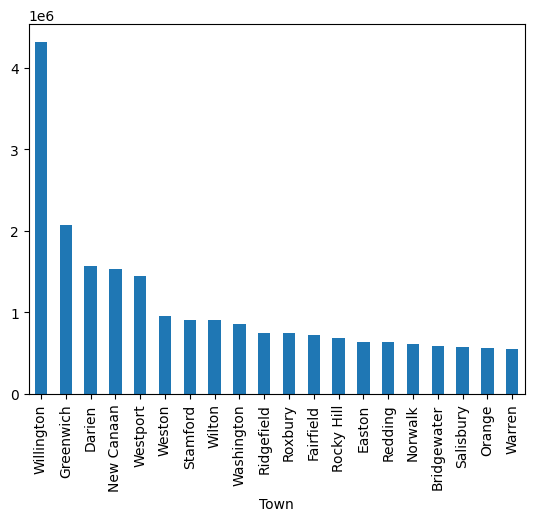

In [24]:
#average sale price by town barplot top 20 towns
df.groupby('Town')['Sale Amount'].mean().sort_values(ascending=False).head(20).plot(kind='bar')

In [25]:
#COUNT OF SALES BY PROPERTY TYPE
df['Property Type'].value_counts()

Property Type
Single Family     784009
Residential       112099
Condo             105419
Two Family         26407
Three Family       12586
Vacant Land         5746
Commercial          4208
Four Family         2150
Apartments           943
Industrial           533
Public Utility         8
Name: count, dtype: int64

Count of each property type

<Axes: xlabel='Property Type'>

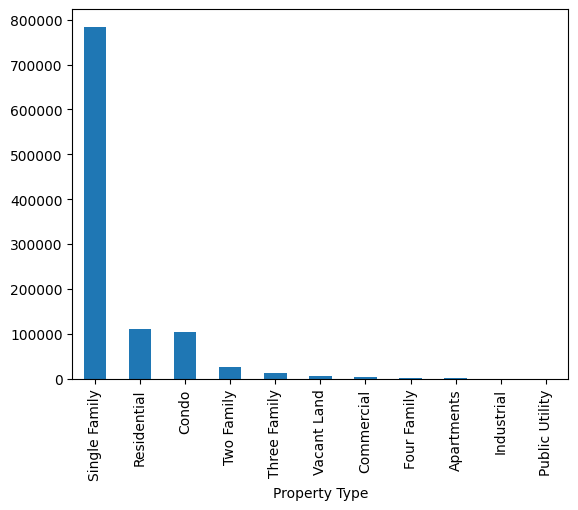

In [26]:
#above plot
df['Property Type'].value_counts().plot(kind='bar')

In [27]:
df.groupby('Property Type')['Sale Amount']

box plot of Sales Amount vs Property type

(0.0, 500000000.0)

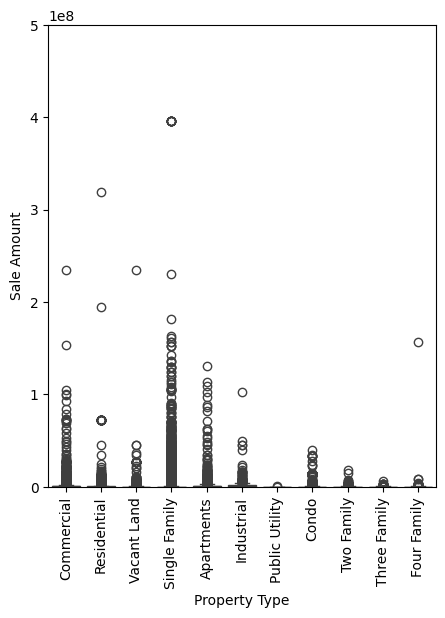

In [28]:
#box plot of average sale amount by property type

#reducing scale
plt.figure(figsize=(5, 6))
plt.xticks(rotation=90)
sns.boxplot(x='Property Type', y='Sale Amount', data=df)
plt.ylim(0, 500000000)

Top 10 town wise Sales Amount

(0.0, 500000000.0)

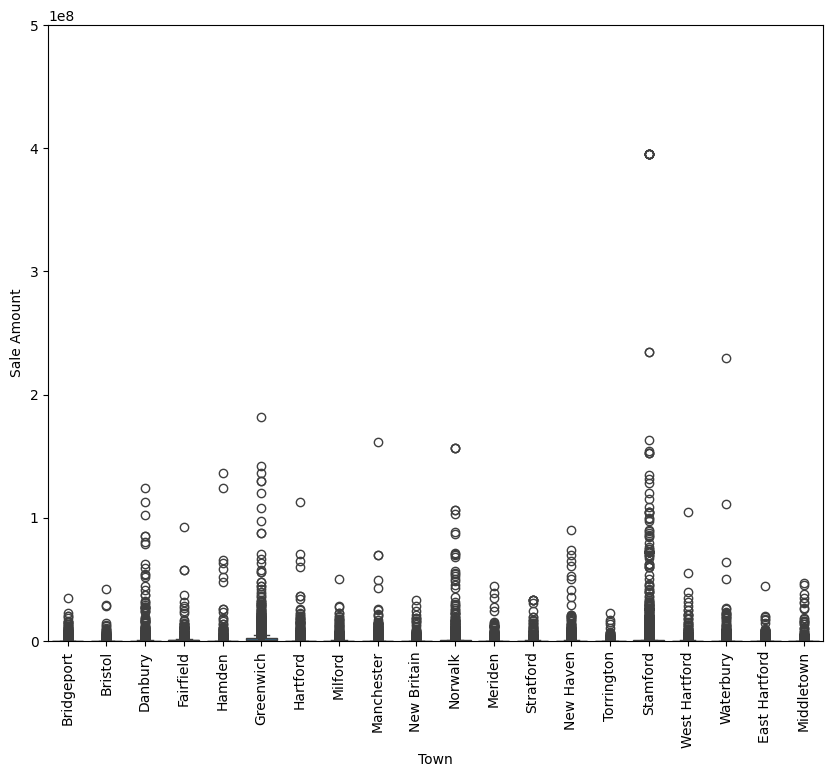

In [29]:
# sale price by town boxplot top 20 towns

#only top 20 towns
top_20_towns = df['Town'].value_counts().head(20).index.tolist()
df_top_20 = df[df['Town'].isin(top_20_towns)]

plt.figure(figsize=(10, 8))

plt.xticks(rotation=90)
sns.boxplot(x='Town', y='Sale Amount', data=df_top_20)
plt.ylim(0, 500000000)


Stacked bar plot of count of sales by property type and residential type

<Figure size 1200x800 with 0 Axes>

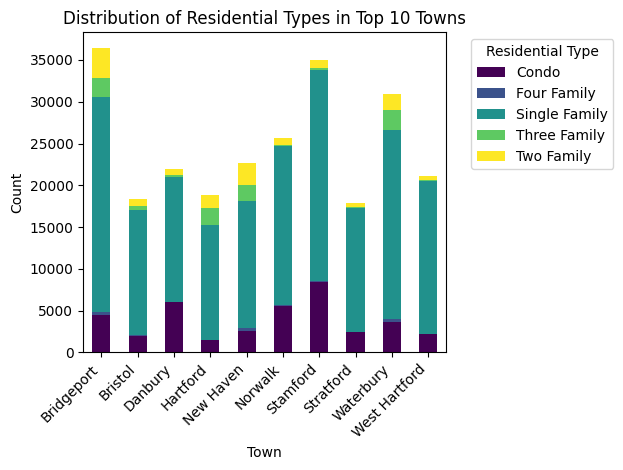

In [31]:
top_10_towns = df['Town'].value_counts().head(10).index.tolist()

# Filter the dataframe for the top 10 towns
df_top_10_towns = df[df['Town'].isin(top_10_towns)]

# Create a crosstab to count the occurrences of each residential type in each town
town_residential_ct = pd.crosstab(df_top_10_towns['Town'], df_top_10_towns['Residential Type'])

# Plot the stacked bar plot
plt.figure(figsize=(12, 8))
town_residential_ct.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Distribution of Residential Types in Top 10 Towns')
plt.xlabel('Town')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Residential Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Stacked barplot of count of sales residential type

<Figure size 1200x800 with 0 Axes>

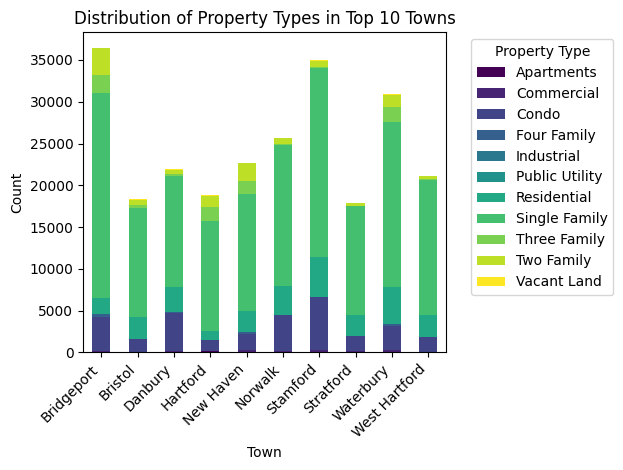

In [33]:
top_10_towns = df['Town'].value_counts().head(10).index.tolist()

# Filter the dataframe for the top 10 towns
df_top_10_towns = df[df['Town'].isin(top_10_towns)]

# Create a crosstab to count the occurrences of each residential type in each town
town_residential_ct = pd.crosstab(df_top_10_towns['Town'], df_top_10_towns['Property Type'])

# Plot the stacked bar plot
plt.figure(figsize=(12, 8))
town_residential_ct.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Distribution of Property Types in Top 10 Towns')
plt.xlabel('Town')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Property Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Count of Property sales Year wise

In [34]:
#for every year
df['List Year'].value_counts()



List Year
2004    84027
2020    66592
2003    64232
2005    61601
2002    59680
2001    59582
2019    58954
2021    56946
2018    50709
2016    49773
2014    49563
2006    48778
2015    46651
2017    45688
2009    42508
2013    39943
2012    35973
2007    35617
2010    33491
2008    32735
2011    31065
Name: count, dtype: int64

<Axes: xlabel='List Year'>

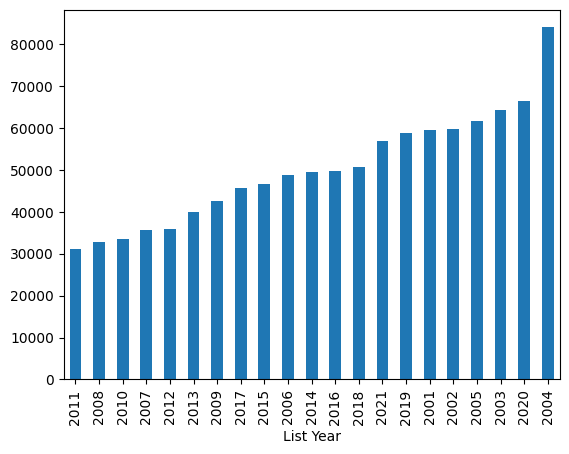

In [35]:
df['List Year'].value_counts().sort_values(ascending= True).plot(kind='bar')

line plot of average sale amount by year

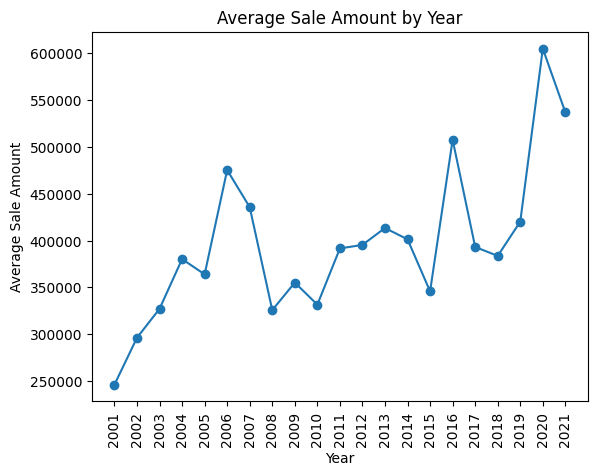

In [37]:
df.groupby('List Year')['Sale Amount'].mean().plot(kind='line', marker='o')

plt.xticks(rotation=90)
plt.xticks(df['List Year'].unique())  # Set x-axis ticks to unique List Year values
plt.xlabel('Year')  # Set x-axis label
plt.ylabel('Average Sale Amount')  # Set y-axis label
plt.title('Average Sale Amount by Year')  # Set plot title
plt.show()

stacked line plot of average sale amount by year and property type

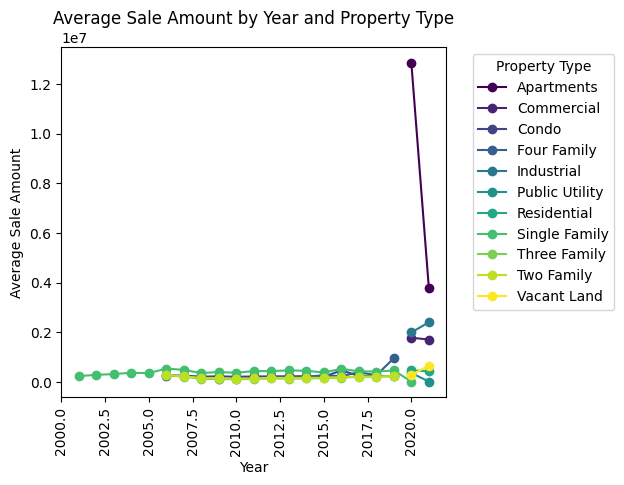

In [39]:
# similarly for property type yeare
df.groupby(['List Year', 'Property Type'])['Sale Amount'].mean().unstack().plot(kind='line', marker='o', colormap='viridis')

plt.xticks(rotation=90)
plt.xlabel('Year')
plt.ylabel('Average Sale Amount')
plt.title('Average Sale Amount by Year and Property Type')
plt.legend(title='Property Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

plt.show()

In [40]:
# Create a crosstab of List Year and Property Type
year_property_ct = pd.crosstab(df['List Year'], df['Property Type'])


In [41]:
average_sales_amount_year_property = df.groupby(['List Year', 'Property Type'])['Sale Amount'].mean()
print(average_sales_amount_year_property)

List Year  Property Type 
2001       Single Family     2.462405e+05
2002       Single Family     2.963671e+05
2003       Single Family     3.272450e+05
2004       Single Family     3.803097e+05
2005       Single Family     3.640335e+05
                                 ...     
2021       Commercial        1.717037e+06
           Industrial        2.410471e+06
           Public Utility    2.583333e+04
           Residential       4.392860e+05
           Vacant Land       6.682100e+05
Name: Sale Amount, Length: 88, dtype: float64


Tree map of average sale amount by Property Type

In [43]:
import plotly.express as px
data_avg = df.groupby(['List Year', 'Property Type'])['Sale Amount'].mean().reset_index()

# Plot the treemap
fig = px.treemap(data_avg, path=["List Year", "Property Type"], values="Sale Amount")
fig.show()

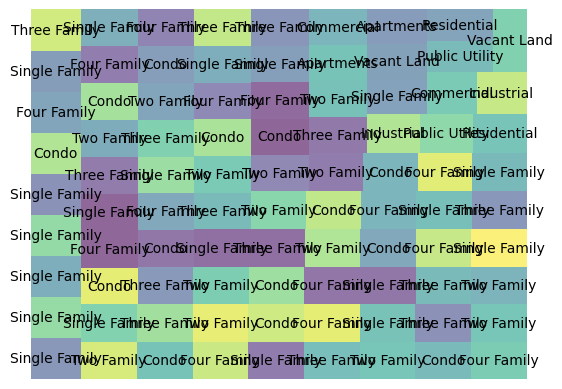

In [44]:
import squarify
sizes=data_avg["List Year"].tolist()
label=data_avg["Property Type"].tolist()
squarify.plot(sizes=sizes, label=label, alpha=0.6 )
plt.axis("off")
plt.show()

tree map of average sale amount by Residential Type

In [46]:
data_avg_Residential = df.groupby(['List Year', 'Residential Type'])['Sale Amount'].mean().reset_index()

# Plot the treemap
fig = px.treemap(data_avg_Residential, path=["List Year", "Residential Type"], values="Sale Amount")
fig.show()

stacked bar plot of average sale amount by town and property type

<Figure size 1500x1000 with 0 Axes>

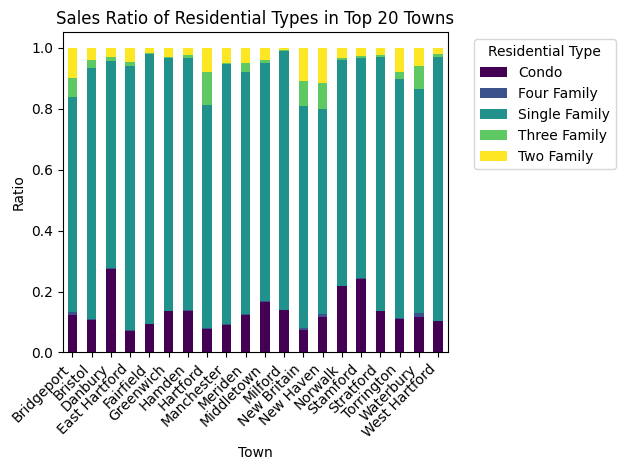

In [48]:
#sales ratio by town top 50
plt.figure(figsize=(15, 10))
top_50_towns = df['Town'].value_counts().head(20).index.tolist()

# Filter the dataframe for the top 50 towns
df_top_50_towns = df[df['Town'].isin(top_50_towns)]

# Create a crosstab to count the occurrences of each residential type in each town

town_residential_ct = pd.crosstab(df_top_50_towns['Town'], df_top_50_towns['Residential Type'])

# Calculate the total number of sales in each town
town_residential_ct['Total'] = town_residential_ct.sum(axis=1)


# Calculate the ratio of each residential type in each town
for residential_type in town_residential_ct.columns[:-1]:
    town_residential_ct[residential_type] = town_residential_ct[residential_type] / town_residential_ct['Total']

# Plot the stacked bar plot

town_residential_ct.drop(columns='Total').plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Sales Ratio of Residential Types in Top 20 Towns')
plt.xlabel('Town')
plt.ylabel('Ratio')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Residential Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()





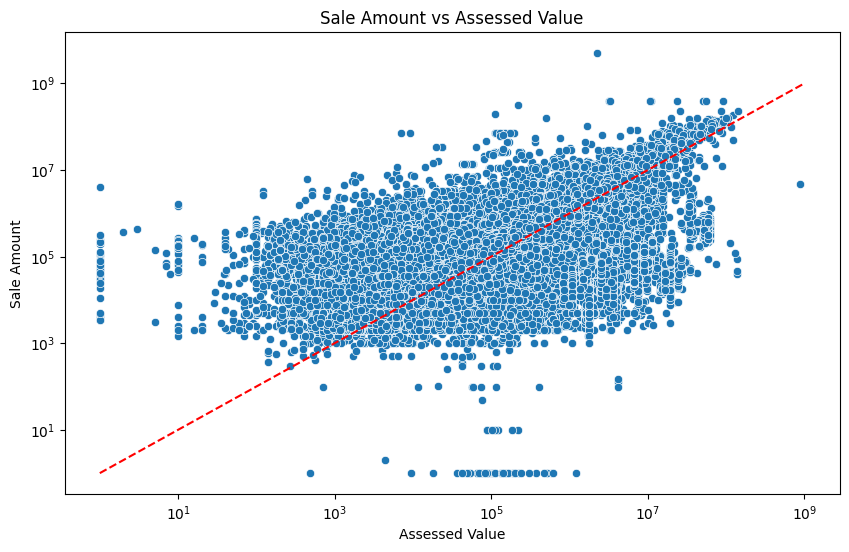

In [49]:
#scatter plot of sale amount vs assessed value
plt.figure(figsize=(10, 6))

sns.scatterplot(x='Assessed Value', y='Sale Amount', data=df)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Assessed Value')
plt.ylabel('Sale Amount')
plt.title('Sale Amount vs Assessed Value')

# Plot the line y = x passing through the origin

x = np.linspace(1, 1e9, 100)
plt.plot(x, x, color='red', linestyle='--')
plt.show()




In [50]:
#analysis of sale amount vs assessed value
df['Assessed Value'].describe()

df['Sale Amount'].describe()

# Calculate the correlation between
# Sale Amount and Assessed Value
correlation = df['Sale Amount'].corr(df['Assessed Value'])
print('Correlation between Sale Amount and Assessed Value:', correlation)

# Calculate the percentage of sales where the Sale Amount is greater than the Assessed Value
percent_greater = (df['Sale Amount'] > df['Assessed Value']).mean() * 100

print('Percentage of sales where Sale Amount is greater than Assessed Value:', percent_greater)

# Calculate the percentage of sales where the Sale Amount is less than the Assessed Value

percent_less = (df['Sale Amount'] < df['Assessed Value']).mean() * 100
print('Percentage of sales where Sale Amount is less than Assessed Value:', percent_less)

# Calculate the percentage of sales where the Sale Amount is equal to the Assessed Value
percent_equal = (df['Sale Amount'] == df['Assessed Value']).mean() * 100
print('Percentage of sales where Sale Amount is equal to Assessed Value:', percent_equal)



Correlation between Sale Amount and Assessed Value: 0.12160817408762675
Percentage of sales where Sale Amount is greater than Assessed Value: 87.09050685508505
Percentage of sales where Sale Amount is less than Assessed Value: 12.82487183476456
Percentage of sales where Sale Amount is equal to Assessed Value: 0.08462131015038307


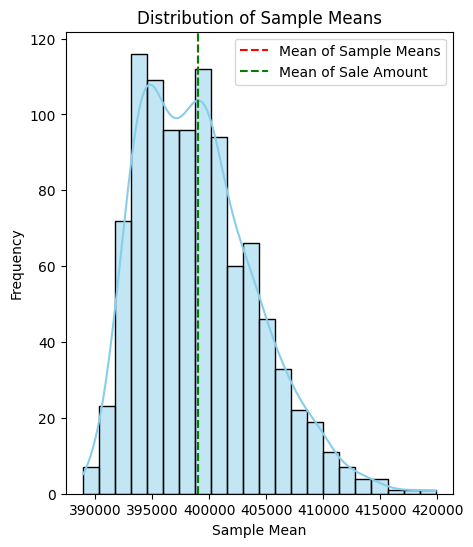

In [51]:
#central limit theorem for sales amount

# Calculate the mean and standard deviation of the Sale Amount
mean_sale_amount = df['Sale Amount'].mean()
std_sale_amount = df['Sale Amount'].std()

# Generate 1000 samples of size 100 from the Sale Amount
sample_means = []

for i in range(1000):
    sample = np.random.choice(df['Sale Amount'], size=1000000, replace=True)
    sample_means.append(sample.mean())

# Calculate the mean and standard deviation of the sample means
mean_sample_means = np.mean(sample_means)
std_sample_means = np.std(sample_means)

# Plot the histogram of the sample means
plt.figure(figsize=(5, 6))
sns.histplot(sample_means, kde=True, color='skyblue')
plt.axvline(mean_sample_means, color='red', linestyle='--', label='Mean of Sample Means')
plt.axvline(mean_sale_amount, color='green', linestyle='--', label='Mean of Sale Amount')
plt.xlabel('Sample Mean')
plt.ylabel('Frequency')
plt.title('Distribution of Sample Means')
plt.legend()
plt.show()

T-test (p-test):
Null Hypothesis: There is no significant difference in the mean sale amount between different types of residential properties.

In [52]:
from scipy.stats import ttest_ind

# Example of performing a t-test
sale_amount_single_family = df['Sale Amount'][df['Residential Type'] == 'Single Family']
sale_amount_condo = df['Sale Amount'][df['Residential Type'] == 'Condo']
t_stat, p_value = ttest_ind(sale_amount_single_family, sale_amount_condo)
print("T-test (p-test) results:")
print("T-statistic:", t_stat)
print("P-value:", p_value)

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")


T-test (p-test) results:
T-statistic: 9.31613825139534
P-value: 1.208837149548951e-20
Reject the null hypothesis


In [54]:
from scipy.stats import f_oneway

# Extracting sale amounts for each residential type
sale_amount_single_family = df['Sale Amount'][df['Residential Type'] == 'Single Family']
sale_amount_condo = df['Sale Amount'][df['Residential Type'] == 'Condo']
sale_amount_four_fam = df['Sale Amount'][df['Residential Type'] == 'Four Family']
sale_amount_two_fam = df['Sale Amount'][df['Residential Type'] == 'Two Family']
sale_amount_three_fam = df['Sale Amount'][df['Residential Type'] == 'Three Family']

# Perform one-way ANOVA test
f_stat, p_value = f_oneway(sale_amount_single_family, sale_amount_condo, sale_amount_four_fam, sale_amount_two_fam, sale_amount_three_fam)

print("One-way ANOVA results:")
print("F-statistic:", f_stat)
print("P-value:", p_value)

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")


One-way ANOVA results:
F-statistic: 38.39366075918406
P-value: 3.507239355810803e-32
Reject the null hypothesis
